- seabron：高级的绘图工具
    - Matplotlib虽然已经是比较优秀的绘图库了，但是它有个今人头疼的问题，那就是API使用过于复杂，它里面有上千个函数和参数，属于典型的那种可以用它做任何事，却无从下手。
    - Seaborn基于Matplotlib核心库进行了更高级的API封装，可以轻松地画出更漂亮的图形，而Seaborn的漂亮主要体现在配色更加舒服，以及图形元素的样式更加细腻。


- 当处理一组数据时，通常先要做的就是了解变量是如何分布的。
    - 对于单变量的数据来说采用直方图或核密度曲线是个不错的选择,
    - 对于双变量来说，可采用多面板图形展现，比如散点图、二维直方图、核密度估计图形等。
- 针对这种情况，Seaborn库提供了对单变量和双变量分布的绘制函数，如distplot()函数、jointplot()函数

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series,DataFrame

### 绘制单变量分布
- sns.displot(data,bins,kde,rug,fit,color,kind)
    - data：表示要观察的数据，可以是Series、一维数组或列表
    - bins：用于控制条形的数量
    - kde：接收布尔类型，表示是否绘制高斯核密度估计曲线
    - rug：接收布尔类型，表示是否在支持的轴方向上绘制rugplot
    - kind：只能是这三个['hist', 'kde', 'ecdf']

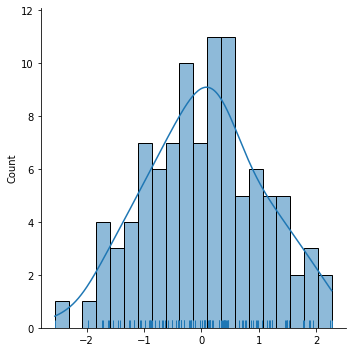

In [3]:
# 随机种子，把随机取数给定死，这样数据就确定下来
np.random.seed(0)
arr = np.random.randn(100)

# 绘制单变量分布
sns.displot(arr,bins=20,kde=True,rug=True)

### 绘制双变量分布
- seaborn.jointplot(x,y,data,kind,stat_func,color,ratio,space,dropna)
    - x，y：需要使用的列（列名），对应x轴，y轴
    - data：用到的数据
    - kind：绘制图形的类型
    - stat_func：计算有关关系的统计量并标注图
    - color：绘图颜色
    - height：图的高度
    - ratio：中心图与侧边图的比例。ratio越大，中心图占比越高。
    - space：中心图与侧边图的间隔大小

- 绘制散点图

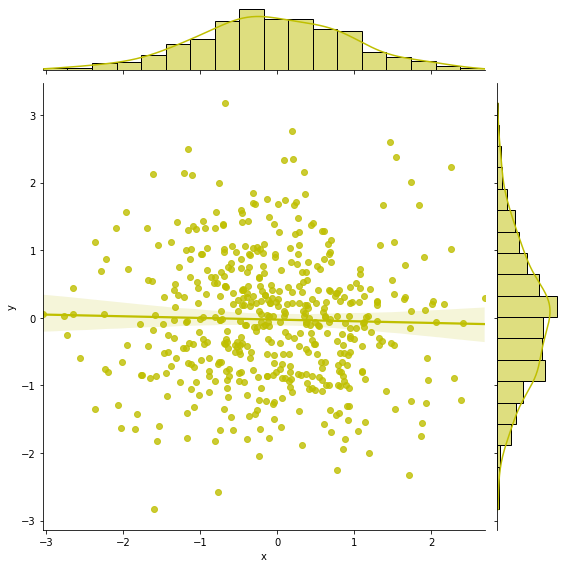

In [112]:
data = DataFrame({"x":np.random.randn(500),"y":np.random.randn(500)})

sns.jointplot(x="x",y="y",data=data,kind="reg",height=8,ratio=6,color="y")

- 绘制二维直方图

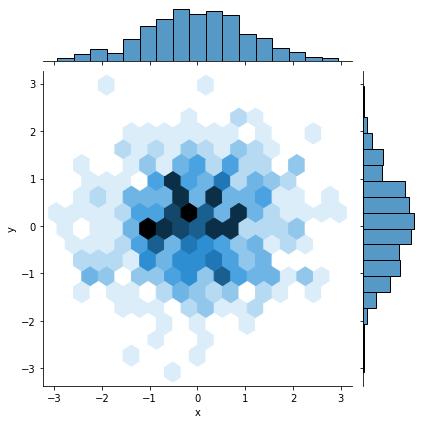

In [119]:
data = DataFrame({"x":np.random.randn(500),"y":np.random.randn(500)})

sns.jointplot(x="x",y="y",data=data,kind="hex")

- 绘制核密度估计图

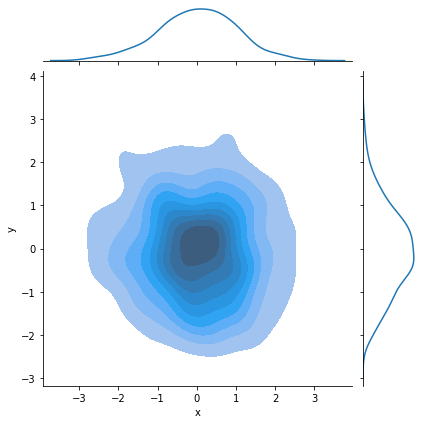

In [161]:
data = DataFrame({"x":np.random.randn(500),"y":np.random.randn(500)})

sns.jointplot(x="x",y="y",data=data,kind="kde",joint_kws={"shade":True}) # joint_kws={"shade":True}，设置阴影，也可以在其中加入其他参数


### 绘制成对的双变量分布
- sns,pairplot(data)

In [144]:
# 数据集从github导入，但是安全证书出现一些问题，故无法加载数据，需要加上下面代码
import ssl
 
ssl._create_default_https_context = ssl._create_unverified_context

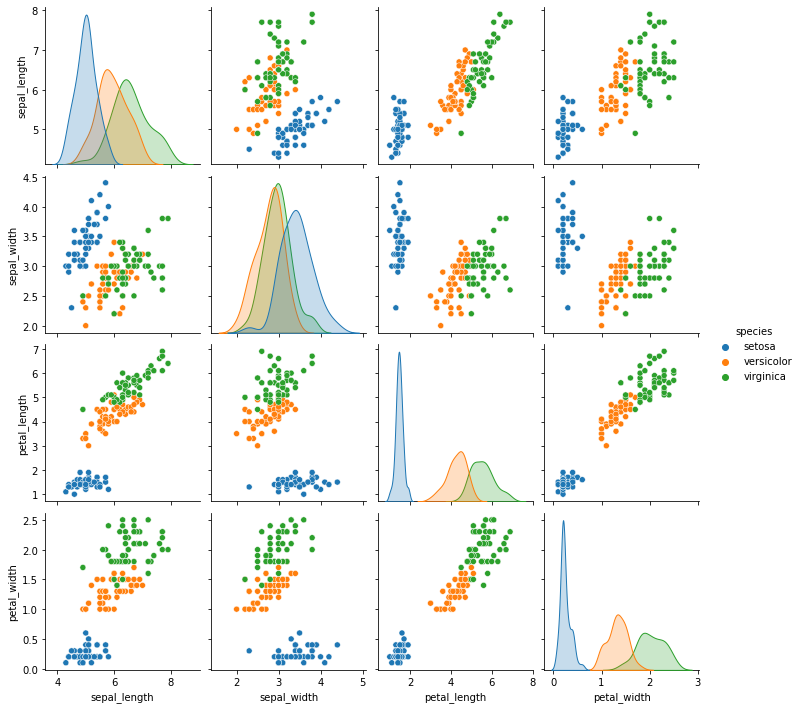

In [218]:
# 加载数据集
# data = sns.load_dataset("iris")   # 无法访问github，从本地加载
data = sns.load_dataset(name="iris",data_home="./seaborn-data")

sns.pairplot(data,hue="species")  # 按照hue指定的特征或标签类别，根据不同颜色进行区分

### 分类数据散点图
- sns.stripplot(x,y,hue,data,order,hue_order,jitter)
- sns.swarmplot(x,y,hue,data,order,hue_order,jitter)：可以使得散点完全没有重叠部分
    - hue：按照hue指定的特征或标签类别，根据不同颜色进行区分
    - jitter：表示抖动的程度(仅沿类别轴)。当很多数据点重叠时，可以指定抖动的数量或者设为True使用默认值
    - order：进行筛选分类类别。例如：x="day"，那么order = ['Sat','Sun']

<AxesSubplot:xlabel='day', ylabel='tip'>

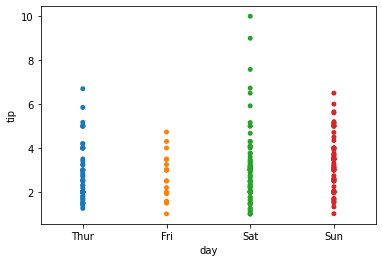

In [221]:
# 加载数据
data = sns.load_dataset(name="tips",data_home="./seaborn-data/")
sns.stripplot(x="day",y="tip",data=data,jitter=False)  # 图中的散点基本上重叠了

<AxesSubplot:xlabel='day', ylabel='tip'>

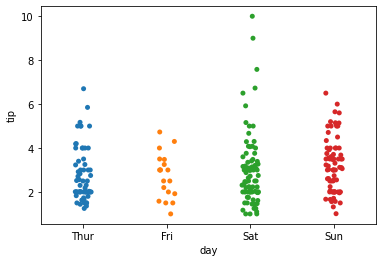

In [187]:
# 设置jitter=True，将散点分开
sns.stripplot(x="day",y="tip",data=data,jitter=True)

<AxesSubplot:xlabel='day', ylabel='tip'>

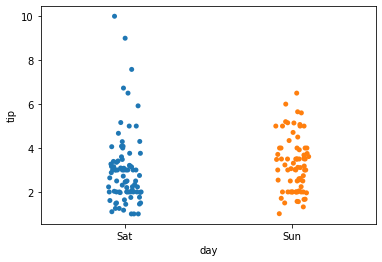

In [184]:
# 使用order参数，只展示一部分数据的关系。如：['Sat','Sun']
sns.stripplot(x="day",y="tip",data=data,order=["Sat","Sun"])

E:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
E:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='day', ylabel='tip'>

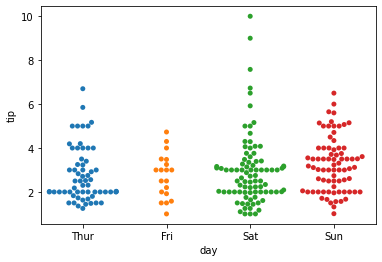

In [181]:
# 若想要散点完全没有重叠，使用swarmplot()
sns.swarmplot(x="day",y="tip",data=data)

### 类别内的数据分布
- 要想查看各个分类中的数据分布，显而易见，散点图是不满足需求的，原因是它不够直观。针对这种情况，我们可以绘制如下两种图形进行查看:

- 箱型图
- sns.boxplot(x,y,hue,data,orient,color,saturation,width)
    - palette：用于设置不同级别色相的颜色变量。例如：palette=["r","g","b","y"]
    - saturation：设置数据显示颜色的饱和度，使用小数表示

<AxesSubplot:xlabel='day', ylabel='total_bill'>

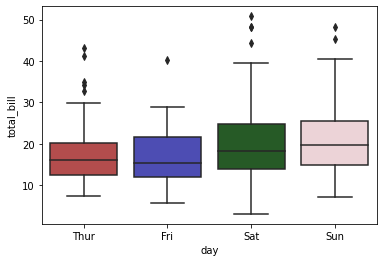

In [203]:
sns.boxplot(x="day",y="total_bill",data=data,palette={"green","pink","blue","red"},saturation=0.4)

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='total_bill'>

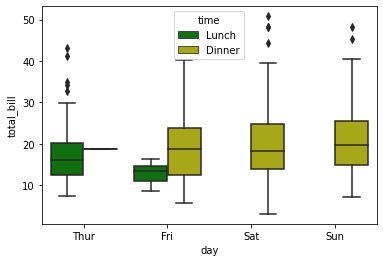

In [222]:
sns.boxplot("day","total_bill",data=data,palette=["g","y","b","r"],hue="time")    # 若设置了hue属性，则palette属性设置的颜色就会根据hue属性的分类进行相应划分

- 小提琴图
- violinplot(x,y,hue,data,orient,color,saturation,width)
    - palette：用于设置不同级别色相的颜色变量。例如：palette=["r","g","b","y"]
    - saturation：设置数据显示颜色的饱和度，使用小数表示

<AxesSubplot:xlabel='day', ylabel='total_bill'>

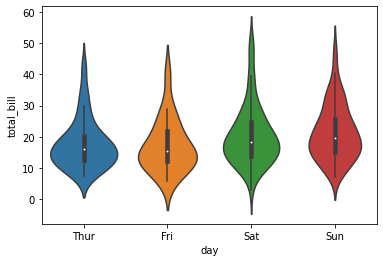

In [205]:
sns.violinplot(x="day",y="total_bill",data=data)

### 类别内的统计估计
- 要想查看每个分类的集中趋势，则可以使用条形图和点图进行展示。
- barplot()：绘制条形图
- pointplot()：绘制点图


<AxesSubplot:xlabel='day', ylabel='total_bill'>

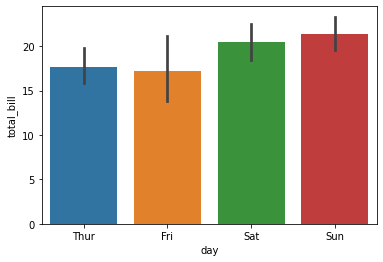

In [223]:
sns.barplot(x="day",y="total_bill",data=data)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

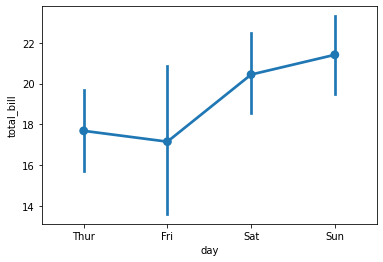

In [226]:
sns.pointplot("day","total_bill",data=data)